In [1]:
##########################################################################################
#                                                                                        #
#  888888b.  8888888 .d88888b.   .d8888b.     .d8888b.   .d8888b.      d8888      d8888  #
#  888  "88b   888  d88P" "Y88b d88P  Y88b   d88P  Y88b d88P  Y88b    d8P888     d8P888  #
#  888  .88P   888  888     888 Y88b.        888        888          d8P 888    d8P 888  #
#  8888888K.   888  888     888  "Y888b.     888d888b.  888d888b.   d8P  888   d8P  888  #
#  888  "Y88b  888  888     888     "Y88b.   888P "Y88b 888P "Y88b d88   888  d88   888  #
#  888    888  888  888     888       "888   888    888 888    888 8888888888 8888888888 #
#  888   d88P  888  Y88b. .d88P Y88b  d88P   Y88b  d88P Y88b  d88P       888        888  #
#  8888888P" 8888888 "Y88888P"   "Y8888P"     "Y8888P"   "Y8888P"        888        888  #
#                                                                                        # 
##########################################################################################
#
# Diana Ir's project
#
##########################################################################################

In [2]:
#Fetch data:
#go to this website: https://factfinder.census.gov/faces/nav/jsf/pages/index.xhtml
#click download center
#choose ' know the dataset or table(s) that I want to download', then click 'next'
#select 'nonemployer statistics year 2016', click 'add to selection', click 'next'
#select 'county 050' in the geographic selection and 'colorado', click 'next'
#select the only dataset there, click download
#select the dataset file 'NES_2016_00A2_with_ann.csv'

#Download the entire table at http://www2.census.gov/econ2016/NS/sector00/NS1600A2.zip.  

In [3]:
import pandas as pd
import pylab as plt
import numpy as np
%matplotlib inline

In [4]:
# Read the data
datafile = '/home/dir0417/Desktop/BIOS6644-master/Data/NES_2016_00A2_with_ann.csv'
df = pd.read_csv(datafile, header = 1)
df

,Geographic identifier code,Id2,Geographic area name,2012 NAICS code,Meaning of 2012 NAICS code,Year,Number of nonemployer establishments,"Receipts ($1,000)"
0,0500000US08001,8001,"Adams County, Colorado",00,Total for all sectors,2016,32870,1488837
1,0500000US08001,8001,"Adams County, Colorado",11,"Agriculture, forestry, fishing and hunting",2016,114,4485
2,0500000US08001,8001,"Adams County, Colorado",113,Forestry and logging,2016,14,563
3,0500000US08001,8001,"Adams County, Colorado",114,"Fishing, hunting and trapping",2016,14,916
4,0500000US08001,8001,"Adams County, Colorado",1141,Fishing,2016,8,176
5,0500000US08001,8001,"Adams County, Colorado",11411,Fishing,2016,8,176
6,0500000US08001,8001,"Adams County, Colorado",1142,Hunting and trapping,2016,D,D
7,0500000US08001,8001,"Adams County, Colorado",11421,Hunting and trapping,2016,D,D
8,0500000US08001,8001,"Adams County, Colorado",115,Support activities for agriculture and forestry,2016,86,3006
9,0500000US08001,8001,"Adams County, Colorado",1151,Support activities for crop production,2016,33,1542


In [5]:
# Problem description / Data wrangling:
# The dataset 'NES_2016_00A2_with_ann.csv' was collected by the United States Census Beauru 2016.
# There are 19323 total rows with 8 columns labeled: Geographic identifying code, ID2, geographic area name, 
# 2012 NAICS code, Meaning of 2012 NAICS code, Year, number of nonemployer establishments, and receipts ($1000).
# The data is already consolidated. So what we need to wrangle is the “messiness,” meaning that it has 
# missing and inaccurate data.  The missings and inaccurate data was defined as D = disclosed, S = did not meet
# publication standards, or N = not available in the dataset. 
# So the primary focus on data wrangling and cleaning was to see how the before and after affects the character
# (statistical deviation) of the data.  Statistical deviation includes the mean, median, mode, average, or upper
# and lower quartiles changed from the original, unaltered dataset.

In [6]:
# Importance or significance of using this data:
# The Internal Revenue Service considers nonemployee workers as self-employed, 
# even if they don't actually own a business. As such, independent contractors 
# pay both the employee and the employer share of Social Security and Medicare 
# taxes on the money that they earn. Its to collect data.  
# Several taxes rely on the principle of business establishments. 
# If a business has an establishment or place of business in a state, 
# that business has a tax nexus in that state. The state can then impose an income 
# tax on the income of that establishment, and it can also require the establishment 
# to collect, report, and pay sales taxes. Business is extremely important to a country’s 
# economy because businesses provide both goods and services and jobs. 
# Questions to ask:
    # Can we find out how many nonemployer businesses were established in 2016 from each county?
    # Which county had the highest business establishments?

In [7]:
# Analysis Technique: 
# My prediction of the character of the data would be that there would be not much changes when removing 
# extraneous or unneccessary data. If anything, the result of the tests ran on the cleansed data should be more
# concised and accurate. Any information that does not need to be included would not be and therefore the results
# of any tests should find more consistent values closer and be to the curve.

In [8]:
# Check the number of rows and columns in the dataframe.
df.shape

(19322, 8)

In [9]:
# describing the original dataset

df.describe()

# as we can see here, the other columns - number of nonemployer establishments and receipts ($1000) weren't 
# calculated because there was a text in those columns, so it was read as characters and not numerics. We see the 
# same effects when we describe the median (represented by the 50%) as well.

,Id2,Year
count,19322.000000,19322.0
mean,8060.908809,2016.0
std,36.624019,0.0
min,8001.000000,2016.0
25%,8031.000000,2016.0
50%,8061.000000,2016.0
75%,8091.000000,2016.0
max,8125.000000,2016.0


In [10]:
# figuring out what datatype the dataset is 
df.dtypes

Geographic identifier code              object
Id2                                      int64
Geographic area name                    object
2012 NAICS code                         object
Meaning of 2012 NAICS code              object
Year                                     int64
Number of nonemployer establishments    object
Receipts ($1,000)                       object
dtype: object

In [11]:
#removing the D, S, N characters in the dataset Number of nonemployer establishments
df['Number of nonemployer establishments'] = df['Number of nonemployer establishments'].map(lambda x: x.lstrip('D'))
df['Number of nonemployer establishments'] = df['Number of nonemployer establishments'].map(lambda x: x.lstrip('S'))
df['Number of nonemployer establishments'] = df['Number of nonemployer establishments'].map(lambda x: x.lstrip('N'))
df

,Geographic identifier code,Id2,Geographic area name,2012 NAICS code,Meaning of 2012 NAICS code,Year,Number of nonemployer establishments,"Receipts ($1,000)"
0,0500000US08001,8001,"Adams County, Colorado",00,Total for all sectors,2016,32870,1488837
1,0500000US08001,8001,"Adams County, Colorado",11,"Agriculture, forestry, fishing and hunting",2016,114,4485
2,0500000US08001,8001,"Adams County, Colorado",113,Forestry and logging,2016,14,563
3,0500000US08001,8001,"Adams County, Colorado",114,"Fishing, hunting and trapping",2016,14,916
4,0500000US08001,8001,"Adams County, Colorado",1141,Fishing,2016,8,176
5,0500000US08001,8001,"Adams County, Colorado",11411,Fishing,2016,8,176
6,0500000US08001,8001,"Adams County, Colorado",1142,Hunting and trapping,2016,,D
7,0500000US08001,8001,"Adams County, Colorado",11421,Hunting and trapping,2016,,D
8,0500000US08001,8001,"Adams County, Colorado",115,Support activities for agriculture and forestry,2016,86,3006
9,0500000US08001,8001,"Adams County, Colorado",1151,Support activities for crop production,2016,33,1542


In [12]:
#removing the D, S, N characters in the dataset Receipts ($1,000)
df['Receipts ($1,000)'] = df['Receipts ($1,000)'].map(lambda x: x.lstrip('D'))
df['Receipts ($1,000)'] = df['Receipts ($1,000)'].map(lambda x: x.lstrip('S'))
df['Receipts ($1,000)'] = df['Receipts ($1,000)'].map(lambda x: x.lstrip('N'))
df

,Geographic identifier code,Id2,Geographic area name,2012 NAICS code,Meaning of 2012 NAICS code,Year,Number of nonemployer establishments,"Receipts ($1,000)"
0,0500000US08001,8001,"Adams County, Colorado",00,Total for all sectors,2016,32870,1488837
1,0500000US08001,8001,"Adams County, Colorado",11,"Agriculture, forestry, fishing and hunting",2016,114,4485
2,0500000US08001,8001,"Adams County, Colorado",113,Forestry and logging,2016,14,563
3,0500000US08001,8001,"Adams County, Colorado",114,"Fishing, hunting and trapping",2016,14,916
4,0500000US08001,8001,"Adams County, Colorado",1141,Fishing,2016,8,176
5,0500000US08001,8001,"Adams County, Colorado",11411,Fishing,2016,8,176
6,0500000US08001,8001,"Adams County, Colorado",1142,Hunting and trapping,2016,,
7,0500000US08001,8001,"Adams County, Colorado",11421,Hunting and trapping,2016,,
8,0500000US08001,8001,"Adams County, Colorado",115,Support activities for agriculture and forestry,2016,86,3006
9,0500000US08001,8001,"Adams County, Colorado",1151,Support activities for crop production,2016,33,1542


In [13]:
#changing the empty columns of nonemployer establishments to NaN
df['Number of nonemployer establishments'] = pd.to_numeric(df['Number of nonemployer establishments'])
df

,Geographic identifier code,Id2,Geographic area name,2012 NAICS code,Meaning of 2012 NAICS code,Year,Number of nonemployer establishments,"Receipts ($1,000)"
0,0500000US08001,8001,"Adams County, Colorado",00,Total for all sectors,2016,32870.0,1488837
1,0500000US08001,8001,"Adams County, Colorado",11,"Agriculture, forestry, fishing and hunting",2016,114.0,4485
2,0500000US08001,8001,"Adams County, Colorado",113,Forestry and logging,2016,14.0,563
3,0500000US08001,8001,"Adams County, Colorado",114,"Fishing, hunting and trapping",2016,14.0,916
4,0500000US08001,8001,"Adams County, Colorado",1141,Fishing,2016,8.0,176
5,0500000US08001,8001,"Adams County, Colorado",11411,Fishing,2016,8.0,176
6,0500000US08001,8001,"Adams County, Colorado",1142,Hunting and trapping,2016,NaN,
7,0500000US08001,8001,"Adams County, Colorado",11421,Hunting and trapping,2016,NaN,
8,0500000US08001,8001,"Adams County, Colorado",115,Support activities for agriculture and forestry,2016,86.0,3006
9,0500000US08001,8001,"Adams County, Colorado",1151,Support activities for crop production,2016,33.0,1542


In [14]:
#changing the empty columns of Receipts ($1,000) to NaN
df['Receipts ($1,000)'] = pd.to_numeric(df['Receipts ($1,000)'])
df

,Geographic identifier code,Id2,Geographic area name,2012 NAICS code,Meaning of 2012 NAICS code,Year,Number of nonemployer establishments,"Receipts ($1,000)"
0,0500000US08001,8001,"Adams County, Colorado",00,Total for all sectors,2016,32870.0,1488837.0
1,0500000US08001,8001,"Adams County, Colorado",11,"Agriculture, forestry, fishing and hunting",2016,114.0,4485.0
2,0500000US08001,8001,"Adams County, Colorado",113,Forestry and logging,2016,14.0,563.0
3,0500000US08001,8001,"Adams County, Colorado",114,"Fishing, hunting and trapping",2016,14.0,916.0
4,0500000US08001,8001,"Adams County, Colorado",1141,Fishing,2016,8.0,176.0
5,0500000US08001,8001,"Adams County, Colorado",11411,Fishing,2016,8.0,176.0
6,0500000US08001,8001,"Adams County, Colorado",1142,Hunting and trapping,2016,NaN,NaN
7,0500000US08001,8001,"Adams County, Colorado",11421,Hunting and trapping,2016,NaN,NaN
8,0500000US08001,8001,"Adams County, Colorado",115,Support activities for agriculture and forestry,2016,86.0,3006.0
9,0500000US08001,8001,"Adams County, Colorado",1151,Support activities for crop production,2016,33.0,1542.0


In [15]:
#now we are able to see the mean, median, and quartiles of the 'Number of nonemployer establishments' 
#and 'Receipts ($1,000)' on the table. However, in the data, we can see a section for the column "meaning of 2012 
#NAICS code" saying total for all sectors.  I think this section here will skew the data for each county
#a little because if we graph it, the total for all sectors will be accounted for it.  So I thought about 
#removing that data before we plot our graph.

df.describe()


,Id2,Year,Number of nonemployer establishments,"Receipts ($1,000)"
count,19322.000000,19322.0,12881.000000,1.288100e+04
mean,8060.908809,2016.0,176.257589,8.260998e+03
std,36.624019,0.0,1341.077134,6.809890e+04
min,8001.000000,2016.0,3.000000,3.000000e+00
25%,8031.000000,2016.0,6.000000,1.940000e+02
50%,8061.000000,2016.0,16.000000,6.690000e+02
75%,8091.000000,2016.0,59.000000,2.540000e+03
max,8125.000000,2016.0,68929.000000,3.715001e+06


In [16]:
#dropping in the column Meaning of 2012 NAICS code with categoricals Total for all sectors
df.drop(df.index[df['Meaning of 2012 NAICS code'] == 'Total for all sectors'], inplace = True)
df

#our previous row #'s were 19322, now we are at 19258.  So we dropped a total of 64 "total for all sectors"
#category

,Geographic identifier code,Id2,Geographic area name,2012 NAICS code,Meaning of 2012 NAICS code,Year,Number of nonemployer establishments,"Receipts ($1,000)"
1,0500000US08001,8001,"Adams County, Colorado",11,"Agriculture, forestry, fishing and hunting",2016,114.0,4485.0
2,0500000US08001,8001,"Adams County, Colorado",113,Forestry and logging,2016,14.0,563.0
3,0500000US08001,8001,"Adams County, Colorado",114,"Fishing, hunting and trapping",2016,14.0,916.0
4,0500000US08001,8001,"Adams County, Colorado",1141,Fishing,2016,8.0,176.0
5,0500000US08001,8001,"Adams County, Colorado",11411,Fishing,2016,8.0,176.0
6,0500000US08001,8001,"Adams County, Colorado",1142,Hunting and trapping,2016,NaN,NaN
7,0500000US08001,8001,"Adams County, Colorado",11421,Hunting and trapping,2016,NaN,NaN
8,0500000US08001,8001,"Adams County, Colorado",115,Support activities for agriculture and forestry,2016,86.0,3006.0
9,0500000US08001,8001,"Adams County, Colorado",1151,Support activities for crop production,2016,33.0,1542.0
10,0500000US08001,8001,"Adams County, Colorado",11511,Support activities for crop production,2016,33.0,1542.0


In [17]:
#graphs can't read NaN in the charts, so I will have to remove them first
df2 = df.dropna()

In [18]:
#the counts did go down, but I am assuming those counts belong to the 'total for all sectors' category
df2.describe()

,Id2,Year,Number of nonemployer establishments,"Receipts ($1,000)"
count,12817.000000,12817.0,12817.000000,1.281700e+04
mean,8059.281969,2016.0,138.352579,6.453658e+03
std,36.910600,0.0,563.578528,3.357072e+04
min,8001.000000,2016.0,3.000000,3.000000e+00
25%,8031.000000,2016.0,6.000000,1.920000e+02
50%,8059.000000,2016.0,16.000000,6.610000e+02
75%,8089.000000,2016.0,58.000000,2.478000e+03
max,8125.000000,2016.0,14146.000000,1.211129e+06


In [19]:
#describing the total # of NAICS code in Meaning of 2012 NAICS code
df2['Meaning of 2012 NAICS code'].value_counts()
#Professional, scientific, and technical services has the highest counts, so I will use that.

Professional, scientific, and technical services                                                               128
Accounting, tax preparation, bookkeeping, and payroll services                                                 116
Independent artists, writers, and performers                                                                   116
Offices of real estate agents and brokers                                                                      112
Educational services                                                                                           110
Office administrative services                                                                                 108
Child day care services                                                                                        108
Home health care services                                                                                      106
Support activities for animal production                                        

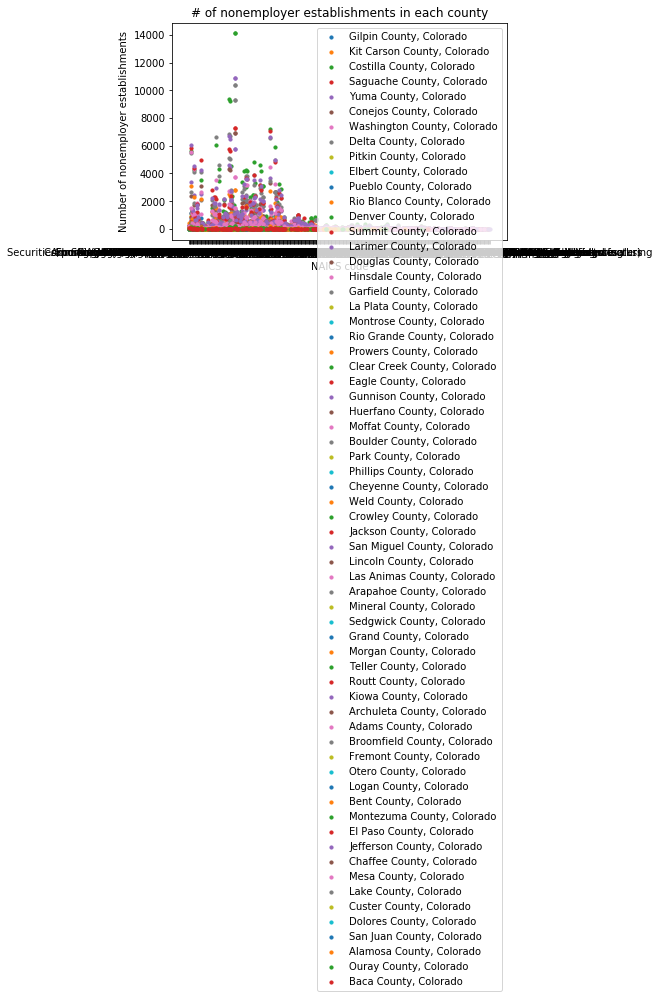

In [24]:
#Scatter of NAICS SciTech
x=df2['Meaning of 2012 NAICS code'] #== 'Professional, scientific, and technical services'
y=df2['Number of nonemployer establishments']

# Get unique names of counties
uniq = list(set(df['Geographic area name']))


# Set the color map to match the number of counties
z = range(1,len(uniq))
hot = plt.get_cmap('nipy_spectral')

# Plot each counties
for i in range(len(uniq)):
    indx = df2['Geographic area name'] == uniq[i]
    plt.scatter(x[indx], y[indx], s=10, label=uniq[i])

plt.xlabel('NAICS code')
plt.ylabel('Number of nonemployer establishments')
plt.title('# of nonemployer establishments in each county')
plt.legend(loc='upper right')
plt.show()

# interpretation: the county with the highest # of nonemployer establishments for is Denver, Colorado. 
# Business establishments in Denver, Colorado means good economy.